In [1]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Video

In [2]:
plt.rcParams['figure.figsize'] = [10,5]

# Simulation Run

In [3]:
#define cell size and resolution
sx = 16
sy = 16

pt = mp.Vector3(-5,4)

resolution = 10

cell = mp.Vector3(sx, sy)

#waveguides position


#define geometry
geometry = [mp.Block(mp.Vector3(mp.inf,1,mp.inf),
                     center=mp.Vector3(-8,4),
                     material=mp.Medium(epsilon=12))]
#define sources
sources = [mp.Source(mp.GaussianSource(frequency=0.15, width=0.1),
                     component=mp.Ez,
                     center=mp.Vector3(-6,4),
                     size=mp.Vector3(0,1))]

#define boundary conditions
pml_layers = [mp.PML(1.0)]


#Instance simulation with chosen parameters
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

In [4]:
# Flux in point 1
refl_fr = mp.FluxRegion(center=mp.Vector3(-5, 4), size=mp.Vector3(0,1,0))
refl = sim.add_flux(0.15, 0.1, 100, refl_fr)

In [5]:
# Flux in point 2
tran_fr = mp.FluxRegion(center=mp.Vector3(6, 4), size=mp.Vector3(0,1,0))
tran = sim.add_flux(0.15, 0.1, 100, tran_fr)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000162125 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 10
     block, center = (-8,4,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0399032 s
-----------
on time step 1000 (time=50), 0.00402335 s/step
field decay(t = 50.050000000000004): 0.00010564745306301359 / 0.00010564745306301359 = 1.0
field decay(t = 100.05000000000001): 3.8479444839708575e-05 / 0.00010564745306301359 = 0.3642250118112876
on time step 2200 (time=110), 0.00333787 s/step
field decay(t = 150.1): 4.4854275425916755e-05 / 0.00010564745306301359 = 0.4245656106746213
on time step 3440 (time=172), 0.00327926 s/step
field decay(t = 200.15): 2.3258030480379884e-05 / 0.00010564745306301359 = 0.22014757389851694
on time step 4660 (time=233), 0.00328195 s/step
field decay(t = 250.20000000000002): 1.5593317801242

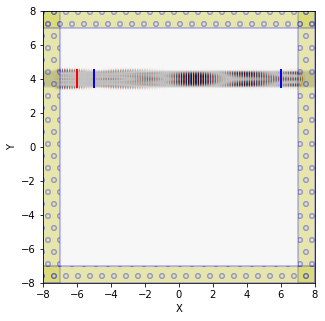

In [6]:
#Rusn simulation and save animation of Ez
animate = mp.Animate2D(sim,
                       fields=mp.Ez,
                       realtime=False,
                       field_parameters={'alpha':0.8, 'cmap':'RdBu', 'interpolation':'spline36'},
                       boundary_parameters={'hatch':'o', 'linewidth':1.5, 'facecolor':'y', 'edgecolor':'b', 'alpha':0.3})


sim.run(mp.at_every(1,animate), until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))

animate.to_mp4(10, "Ez.mp4")

In [7]:
Video("Ez.mp4") #Note: colorbar is not the same for each instant 

In [8]:
straight_refl_data = sim.get_flux_data(refl)
straight_tran_flux = mp.get_fluxes(tran)


[7.686361747316077e-09, 7.431841406509884e-09, 8.411435361243723e-09, 8.207595965326804e-09, 9.175788580400663e-09, 9.047694244152272e-09, 9.983427540836302e-09, 9.956877396973563e-09, 1.0839075598819593e-08, 1.0939858903820647e-08, 1.1747806289771744e-08, 1.2000950247701016e-08, 1.2714638466260045e-08, 1.3143663231659407e-08, 1.3744162278427197e-08, 1.4370356062244357e-08, 1.4840264719981736e-08, 1.5681993646742156e-08, 1.6006008708123905e-08, 1.7078079259546854e-08, 1.7243692467386464e-08, 1.8556788674198333e-08, 1.855508540692526e-08, 2.0115307396208903e-08, 1.9941810337643545e-08, 2.175034068870746e-08, 2.1405819060133495e-08, 2.3458732931423643e-08, 2.2949885786952775e-08, 2.5238100777993988e-08, 2.4578026725721784e-08, 2.7087368456853554e-08, 2.629575863535285e-08, 2.9007107448882686e-08, 2.8110138344297846e-08, 3.099962120239472e-08, 3.0029563244059065e-08, 3.3068757376299484e-08, 3.206334183929386e-08, 3.521946488539211e-08, 3.422106752310755e-08, 3.7457152354869136e-08, 3.6511

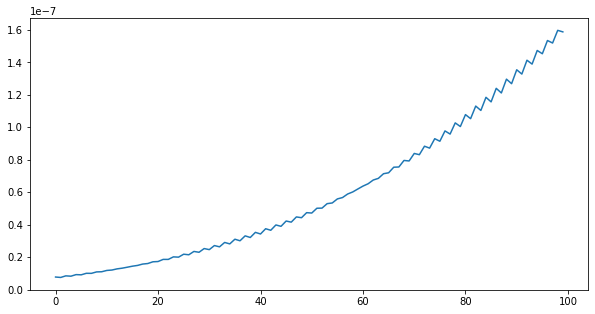

In [9]:
print(straight_tran_flux)
plt.plot(straight_tran_flux)

# Simulation Run 2

In [10]:
sim.reset_meep()

In [11]:
#define cell size and resolution
sx = 16
sy = 16

resolution = 10

cell = mp.Vector3(sx, sy)

pt = mp.Vector3(-5,4)

#waveguides position


#define geometry
geometry = [mp.Block(mp.Vector3(13,1,mp.inf),
                     center=mp.Vector3(-2,4),
                     material=mp.Medium(epsilon=12)),
            
           mp.Block(mp.Vector3(1,13,mp.inf),
                     center=mp.Vector3(4,-3),
                     material=mp.Medium(epsilon=12))]
#define sources
sources = [mp.Source(mp.GaussianSource(frequency=0.15, width=0.2),
                     component=mp.Ez,
                     center=mp.Vector3(-6,4),
                     size=mp.Vector3(0,1))]

#define boundary conditions
pml_layers = [mp.PML(1.0)]


#Instance simulation with chosen parameters
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

In [12]:
# Flux in point 1
refl_fr = mp.FluxRegion(center=mp.Vector3(-5, 4), size=mp.Vector3(0,1,0))
refl = sim.add_flux(0.15, 0.2, 100, refl_fr)

In [13]:
# Flux in point 2
tran_fr = mp.FluxRegion(center=mp.Vector3(4, -6), size=mp.Vector3(1,0,0))
tran = sim.add_flux(0.15, 0.2, 100, tran_fr)

-----------
Initializing structure...
time for choose_chunkdivision = 9.799e-05 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 10
     block, center = (-2,4,0)
          size (13,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (4,-3,0)
          size (1,13,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0391159 s
-----------
field decay(t = 50.050000000000004): 0.0035267722273255807 / 0.0035267722273255807 = 1.0
on time step 1099 (time=54.95), 0.00363979 s/step
field decay(t = 100.05000000000001): 0.0007844514410723276 / 0.0035267722273255807 = 0.2224275883183962
on time step 2040 (time=102), 0.00428096 s/step
on time step 3000 (time=150), 0.0042175 s/step
field decay(t = 150.1): 0.001058281000691428 / 0.0035267722273255807 = 0.30007069707871176
on time step 3960 (time=198), 0.00422316 s/st

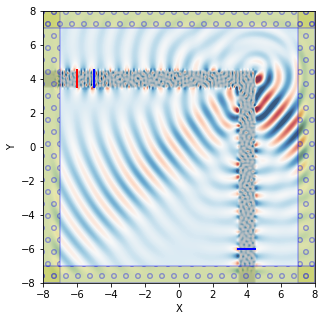

In [14]:
#Rusn simulation and save animation of Ez
animate = mp.Animate2D(sim,
                       fields=mp.Ez,
                       realtime=False,
                       field_parameters={'alpha':0.8, 'cmap':'RdBu', 'interpolation':'spline36'},
                       boundary_parameters={'hatch':'o', 'linewidth':1.5, 'facecolor':'y', 'edgecolor':'b', 'alpha':0.3})


sim.load_minus_flux_data(refl, straight_refl_data)

sim.run(mp.at_every(1,animate), until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))

animate.to_mp4(10, "Ez2.mp4")

In [15]:
Video("Ez2.mp4")

In [16]:
bent_tran_flux = mp.get_fluxes(tran)
bent_refl_flux = mp.get_fluxes(refl)

In [17]:
print(bent_tran_flux)

[-5.51503922281189e-09, -7.442533098438303e-09, -1.0011757136758936e-08, -1.3216944603931732e-08, -1.6841086238435747e-08, -2.0551472425564177e-08, -2.410724194344422e-08, -2.7538010276969836e-08, -3.117725972149974e-08, -3.5542159206877086e-08, -4.1132548268323246e-08, -4.8227757186840234e-08, -5.674114555664598e-08, -6.619979993602888e-08, -7.591466115951473e-08, -8.532298716895677e-08, -9.434160694472871e-08, -1.0350091667577147e-07, -1.1373978659683621e-07, -1.2596120728695124e-07, -1.4059456995575338e-07, -1.5738567724179595e-07, -1.7550486445026643e-07, -1.93926545377983e-07, -2.119155130834281e-07, -2.2936751623840524e-07, -2.467641450045521e-07, -2.646816281313944e-07, -2.830937053878558e-07, -3.009390691759197e-07, -3.163467750646989e-07, -3.274925541685511e-07, -3.3361126574202375e-07, -3.355923805610079e-07, -3.3583888802370296e-07, -3.3740121232152534e-07, -3.4267925212468773e-07, -3.5222842458949525e-07, -3.642911911333387e-07, -3.754495404467086e-07, -3.822663607724315e-0

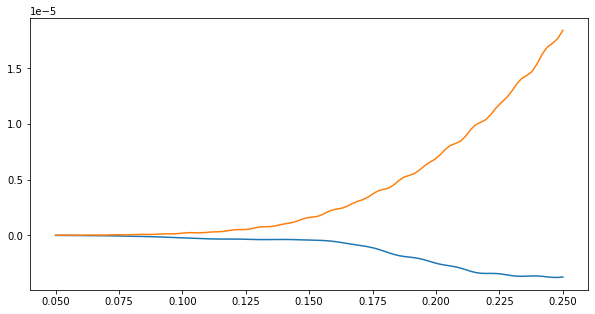

In [18]:
flux_freqs = mp.get_flux_freqs(refl)

plt.plot(flux_freqs, bent_tran_flux, )
plt.plot(flux_freqs, bent_refl_flux)

In [19]:
bent_tran_flux = np.array(bent_tran_flux)
straight_tran_flux = np.array(straight_tran_flux)

bent_tran_flux = np.array(bent_tran_flux)
straight_tran_flux = np.array(straight_tran_flux)

T = bent_tran_flux/straight_tran_flux
R = bent_refl_flux/straight_tran_flux

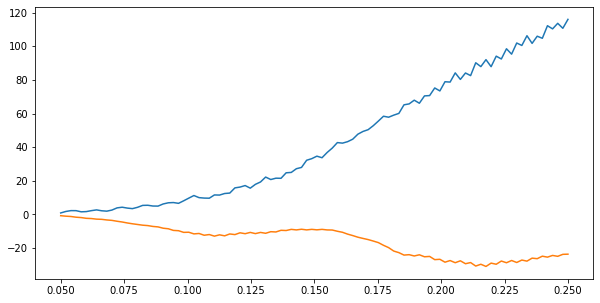

In [20]:
plt.plot(flux_freqs, R)
plt.plot(flux_freqs, T)